## Comparing Core Permeability to Calculated Log Permeability

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_logs = pd.read_csv('Data/Well_Lith_Calc.csv')

In [3]:
all_logs.head()

,DEPTH,CALI,CPERM,CPOR,Density,Facies,GR,Neutron,PEF,Perm,PHIE,RESD,RESM,RESS,Sonic,SP,SW,VShale,Lithology
0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,0.34,NaN,NaN,NaN,13.50,12.64,507.64,NaN,570.34,NaN,NaN,NaN
1,700.5,NaN,NaN,NaN,NaN,NaN,55.64,0.38,NaN,NaN,NaN,13.28,12.71,507.64,NaN,570.54,NaN,NaN,NaN
2,701.0,NaN,NaN,NaN,NaN,NaN,55.12,0.38,NaN,NaN,NaN,12.98,12.51,507.77,NaN,570.83,NaN,NaN,NaN
3,701.5,NaN,NaN,NaN,NaN,NaN,55.32,0.37,NaN,NaN,NaN,12.37,11.93,507.36,NaN,570.27,NaN,NaN,NaN
4,702.0,NaN,NaN,NaN,2.09,NaN,57.05,0.38,15.97,NaN,NaN,11.41,11.03,517.59,NaN,569.14,NaN,NaN,NaN


## Visualising Log Curves

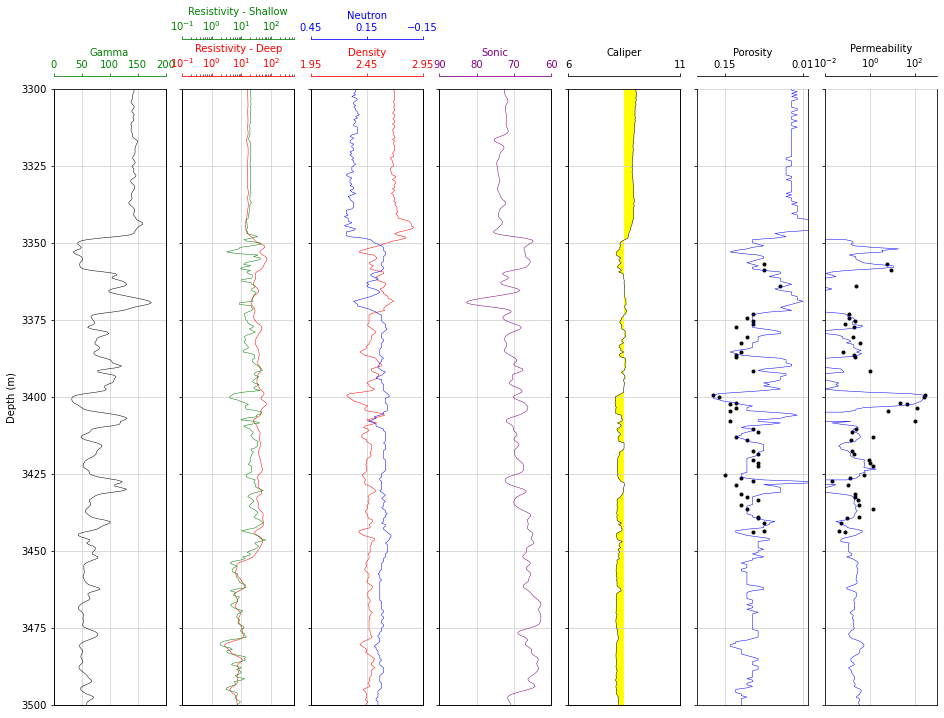

In [3]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,8), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,8), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,8), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,8), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,8), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()
ax8 = plt.subplot2grid((1,8), (0,5), rowspan=1, colspan = 1, sharey = ax1)
ax9 = plt.subplot2grid((1,8), (0,6), rowspan=1, colspan = 1, sharey = ax1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(all_logs["GR"], all_logs['DEPTH'], color = "BLACK", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot(all_logs["RESD"], all_logs['DEPTH'], color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(0.2, 600)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 600])
ax2.semilogx()

# Density track
ax3.plot(all_logs["Density"], all_logs['DEPTH'], color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot(all_logs["Sonic"], all_logs['DEPTH'], color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(90, 60)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot(all_logs["Neutron"], all_logs['DEPTH'], color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Caliper track
ax6.plot(all_logs["CALI"], all_logs['DEPTH'], color = "black", linewidth = 0.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(6, 11)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.fill_betweenx(all_logs['DEPTH'], 8.5, all_logs["CALI"], facecolor='yellow')
ax6.set_xticks([6,  11])

# Resistivity track - Curve 2
ax7.plot(all_logs["RESS"], all_logs['DEPTH'], color = "green", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Shallow")
ax7.set_xlim(0.2, 600)
ax7.xaxis.label.set_color("green")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="green")
ax7.spines["top"].set_edgecolor("green")
ax7.set_xticks([0.1, 1, 10, 100, 600])
ax7.semilogx()

# Porosity track
ax8.plot(all_logs["CPOR"]/100, all_logs['DEPTH'], color = "black", marker='.', linewidth=0)
ax8.plot(all_logs['PHIE'], all_logs['DEPTH'], color ='blue', linewidth=0.5)
ax8.set_xlabel("Porosity")
ax8.set_xlim(0.2, 0)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0.15, 0.01])

# Permeability track
ax9.plot(all_logs["CPERM"], all_logs['DEPTH'], color = "black", marker='.', linewidth=0)
ax9.plot(all_logs['Perm'], all_logs['DEPTH'], color ='blue', linewidth=0.5)
ax9.set_xlabel("Permeability")
ax9.set_xlim(0.1, 1000)
ax9.xaxis.label.set_color("black")
ax9.tick_params(axis='x', colors="black")
ax9.spines["top"].set_edgecolor("black")
ax9.set_xticks([0.01, 1, 10, 100, 1000])
ax9.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.set_ylim(3500, 3300)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
for ax in [ax2, ax3, ax4, ax6, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)

In [4]:
lith_data = all_logs[['CALI', 'GR', 'Density', 'Facies', 'Neutron', 'Lithology']]
lith_data.head()

,CALI,GR,Density,Facies,Neutron,Lithology
0,NaN,NaN,NaN,NaN,0.34,NaN
1,NaN,55.64,NaN,NaN,0.38,NaN
2,NaN,55.12,NaN,NaN,0.38,NaN
3,NaN,55.32,NaN,NaN,0.37,NaN
4,NaN,57.05,2.09,NaN,0.38,NaN


In [5]:
lith_data['Facies'].nunique()

9

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math


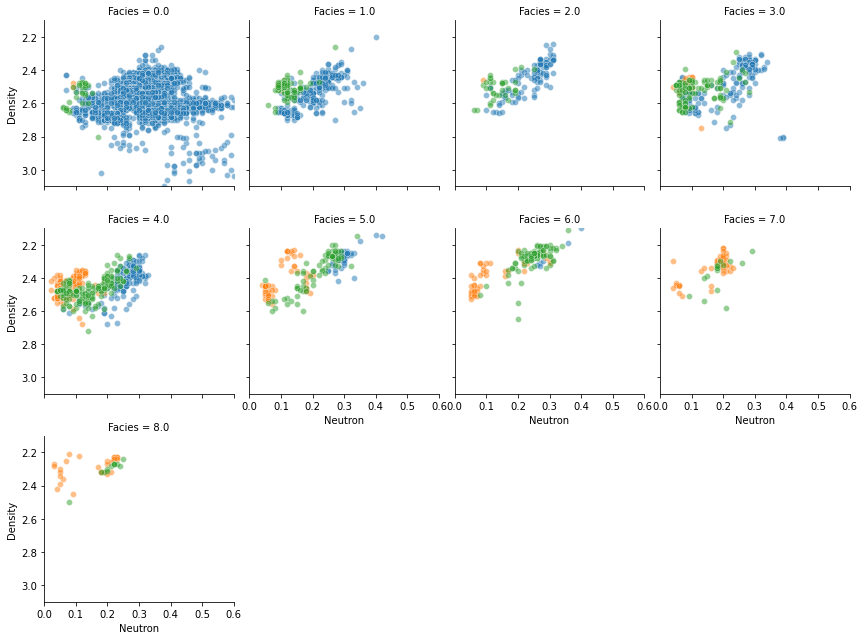

In [8]:
g = sns.FacetGrid(lith_data, col='Facies', hue='Lithology', col_wrap=4)
g.map(sns.scatterplot, 'Neutron', 'Density', alpha=0.5)
g.set(xlim=(0, 0.6))
g.set(ylim=(3.1, 2.1))

In [7]:
lith_data['Lithology'].nunique()

3

<AxesSubplot:xlabel='Facies', ylabel='count'>

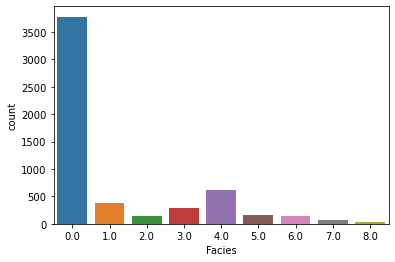

In [8]:
sns.countplot(x="Facies",data=lith_data)

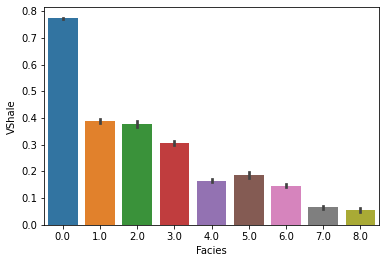

In [11]:
ax = sns.barplot(x="Facies", y="VShale", data=all_logs, ci=68)

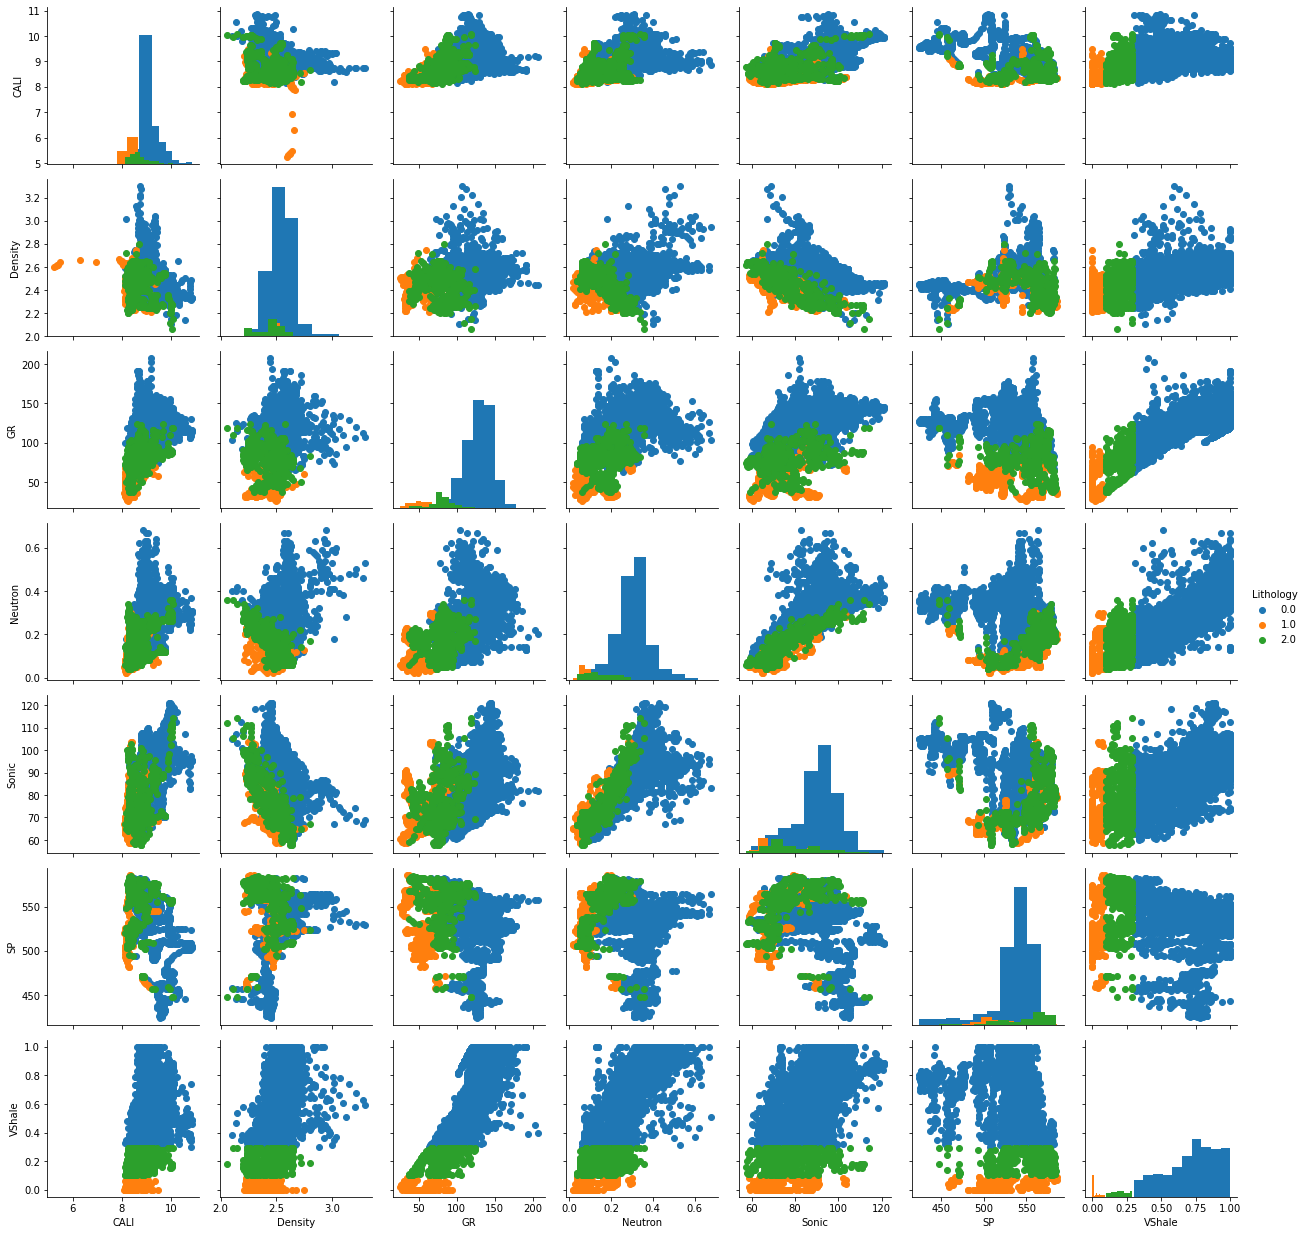

In [12]:
log_data = all_logs[['CALI', 'Density', 'GR', 'Neutron', 'Sonic', 'SP', 'VShale', 'Lithology']]
g = sns.PairGrid(log_data, hue="Lithology")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

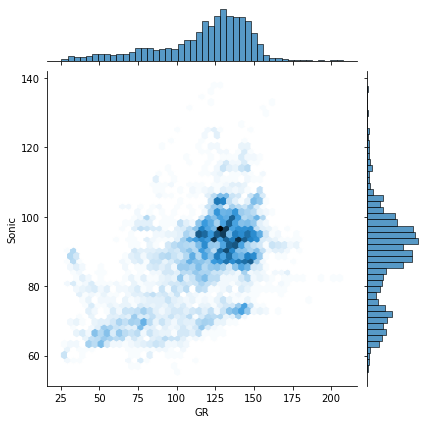

In [13]:
sns.jointplot(x='GR',y='Sonic', data=all_logs,kind='hex')

(0.0, 0.7)

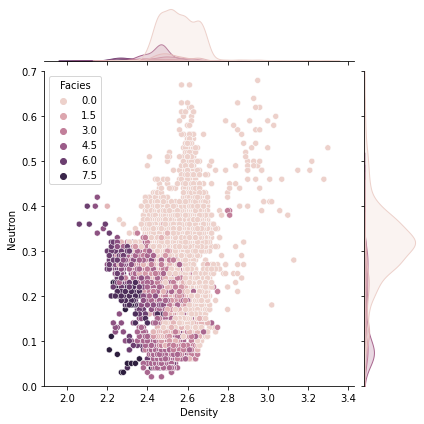

In [14]:
sns.jointplot(x='Density',y='Neutron', hue="Facies", data=all_logs)
plt.ylim(0, 0.7)


(0.0, 1.0)

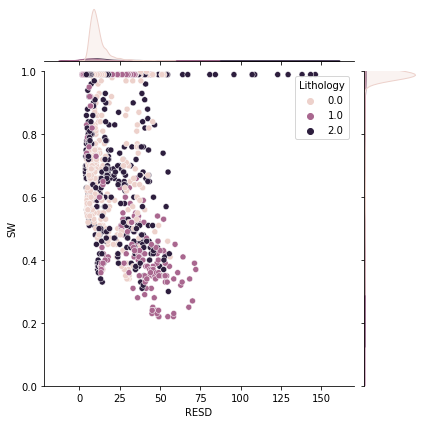

In [15]:
sns.jointplot(x='RESD',y='SW', hue="Lithology", data=all_logs)
plt.ylim(0, 1)

<AxesSubplot:xlabel='SW', ylabel='Density'>

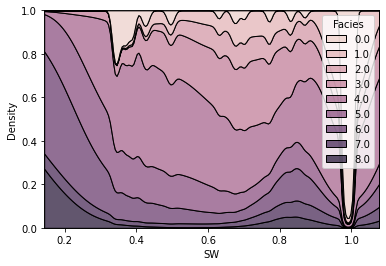

In [16]:
sns.kdeplot(data=all_logs, x='SW', hue="Facies", multiple="fill")

In [17]:
lith_num = {1: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 2: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 0: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'}}

In [18]:
lith_num[1]['color']

'#ffff00'

In [19]:
df_lith = pd.DataFrame.from_dict(lith_num, orient='index')
df_lith.index.name = 'Lithology'
df_lith

,lith,lith_num,hatch,color
Lithology,,,,
1,Sandstone,1,..,#ffff00
2,Sandstone/Shale,2,-.,#ffe119
0,Shale,3,--,#bebebe


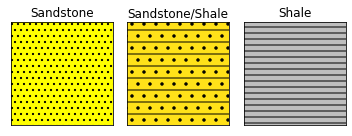

In [20]:

y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=3,nrows=1, sharex=True, sharey=True,
                         figsize=(5,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lith_num.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lith_num[key]['color'], hatch=lith_num[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lith_num[key]['lith']))

plt.tight_layout()

plt.show()


## Well Log Plot With a Lithology Track


In [144]:
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,10))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
    #ax5 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
   
    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax13 = ax4.twiny()
    ax13.xaxis.set_visible(False)

    # Gamma Ray track
    ax1.plot(all_logs["GR"], all_logs['DEPTH'], color = "BLACK", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 200)
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150, 200])
    
    # Density track
    ax2.plot(all_logs["Density"], all_logs['DEPTH'], color = "red", linewidth = 0.5)
    ax2.set_xlabel("Density")
    ax2.set_xlim(1.95, 2.95)
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
    ax2.set_xticks([1.95, 2.45, 2.95])

    # Neutron track placed ontop of density track
    ax3.plot(all_logs["Neutron"], all_logs['DEPTH'], color = "blue", linewidth = 0.5)
    ax3.set_xlabel('Neutron')
    ax3.xaxis.label.set_color("blue")
    ax3.set_xlim(0.45, -0.15)
    ax3.tick_params(axis='x', colors="blue")
    ax3.spines["top"].set_position(("axes", 1.08))
    ax3.spines["top"].set_visible(True)
    ax3.spines["top"].set_edgecolor("blue")
    ax3.set_xticks([0.45,  0.15, -0.15])

    # Lithology track
    ax4.plot(well["Lithology"], well['DEPTH'], color = "black", linewidth = 0.3)
    ax4.set_xlabel("Lithology")
    ax4.set_xlim(0, 1)
    ax4.xaxis.label.set_color("black")
    ax4.tick_params(axis='x', colors="black")
    ax4.spines["top"].set_edgecolor("black")
    
    for key in lith_num.keys():
        color = lith_num[key]['color']
        hatch = lith_num[key]['hatch']
        ax4.fill_betweenx(well['DEPTH'], 0, well['Lithology'], where=(well['Lithology']==key),
                         facecolor=color, hatch=hatch)
        
    ax4.set_xticks([0, 1])
 
    for ax in [ax1, ax2, ax4, ax5]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        
        
    for ax in [ax2, ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)
  
    x1=all_logs['Density']
    x2=all_logs['Neutron']

    x = np.array(ax2.get_xlim())
    z = np.array(ax3.get_xlim())

    nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

    ax2.fill_betweenx(all_logs['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
    ax2.fill_betweenx(all_logs['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

    for ax in [ax2, ax3]:
        ax.set_ylim(3000, 3700)
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")

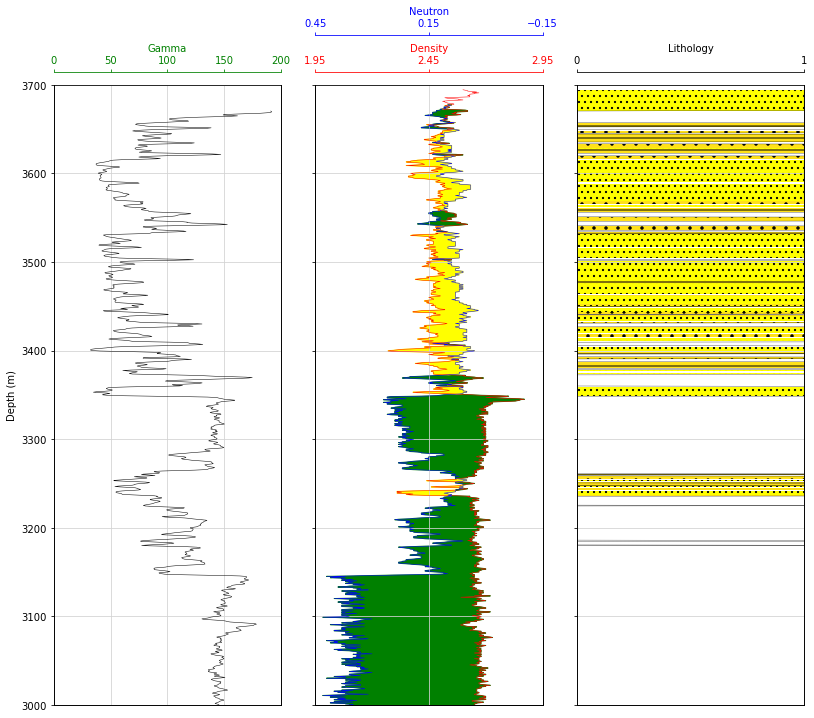

In [145]:
makeplot(all_logs, 3000, 3700)